1. The dataset
==

In the last mission, we looked at calculating probabilities. In this mission, we'll construct probability distributions. But first, let's look at the dataset we'll be using.

In many countries, there are bikesharing programs where anyone can rent a bike from a depot, and return it at other depots throughout a city. There is one such program in Washington, D.C., in the US. We'll be looking at the number of bikes that were rented by day. Here are the relevant columns:

- <span style="background-color: #F9EBEA; color:##C0392B">dteday</span> the date that we're looking at.
- <span style="background-color: #F9EBEA; color:##C0392B">cnt</span> the total number of bikes rented.

This data was collected by <span style="background-color: #F9EBEA; color:##C0392B">Hadi Fanaee-T</span> at the <span style="background-color: #F9EBEA; color:##C0392B">University of Porto</span>, and can be downloaded [here](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset).

2. Binomial distributions
==

In the last mission, we defined **p** as the probability of an outcome occurring, and **q** as the probability of it not occurring, where **q=1−p**. These types of probabilites are known as binomial -- there are two values, which add to <span style="background-color: #F9EBEA; color:##C0392B">1</span> collectively. There's a <span style="background-color: #F9EBEA; color:##C0392B">100%</span> chance of one outcome or the other occurring.

Many commonly occurring events can be expressed in terms of binomial outcomes -- a coin flip, winning a football game, the stock market going up, and more.

When we deal with binomial probabilities, we're often interested in the chance of a certain outcome happening in a sequence. We want to know what the chances are of our favorite football team winning 5 of its next 6 games, and the stock market going up in 4 of the next 6 days.

The same interest applies when we're analyzing data. Companies and researchers conduct experiments every day. These can range from testing whether changing the button color on your webpage increases conversion rate to seeing if a new drug increases patient recovery rate.

The core of these tests is the idea of a binomial distribution -- we want to know how many visitors out of 100 would normally sign up for our website, and we want to know if changing our button color affected that probability.

One easy way to visualize binomials is a binomial distribution. Given <span style="background-color: #F9EBEA; color:##C0392B">N</span> events, it plots the probabilities of getting different numbers of successful outcomes.

3. Bikesharing distribution
==

Let's say we're working for the [mayor of Natal, RN, Carlos Eduardo](https://pt.wikipedia.org/wiki/Carlos_Eduardo_Alves). he wants to know on how many days out of the next <span style="background-color: #F9EBEA; color:##C0392B">30</span> we can expect more than <span style="background-color: #F9EBEA; color:##C0392B">5000</span> riders.

Rather than give her an exact number, which may not be accurate, we can hedge our bets with a probability distribution. This will show her all the possibilities, along with probabilities for each.

First, we have to find the probability of there being more than <span style="background-color: #F9EBEA; color:##C0392B">5000</span> riders in a single day.

<br>
<div class="alert alert-info">
<b>Exercise Start.</b>
</div>

**Description**:

1. Find the probability of there being more than <span style="background-color: #F9EBEA; color:##C0392B">5000</span> riders in a single day (using the <span style="background-color: #F9EBEA; color:##C0392B">cnt</span> column). 
2. Assign the result to <span style="background-color: #F9EBEA; color:##C0392B">prob\_over\_5000</span>


In [1]:
import pandas as pd
bikes = pd.read_csv("bike_rental_day.csv")
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [2]:
#Find the probability of there being more than 5000 riders in a single day (using the cnt column).
#Assign the result to prob_over_5000
qnt = 0

for i in bikes['cnt']:
    if i >= 5000:
        qnt = qnt + 1

total = len(bikes['cnt'])
        
prob_over_5000 = qnt/total

prob_over_5000

0.3912448700410397

4. Computing the distribution
==

We now know that the probability is about <span style="background-color: #F9EBEA; color:##C0392B">.39</span> that there are more than <span style="background-color: #F9EBEA; color:##C0392B">5000</span> riders in a single day. In the last mission, we figured out how to find the probability of <span style="background-color: #F9EBEA; color:##C0392B">k</span> outcomes out of <span style="background-color: #F9EBEA; color:##C0392B">N</span> events occurring. We'll need to use this to build up a list of probabilities.

The formula we used in the last mission was:

$p^k \times (1 - p)^{N-k}\binom{N}{k}$


<br>
<div class="alert alert-info">
<b>Exercise Start.</b>
</div>

**Description**:

1. Using the knowledge from the last mission, create a function that can compute the probability of <span style="background-color: #F9EBEA; color:##C0392B">k</span> outcomes out of <span style="background-color: #F9EBEA; color:##C0392B">N</span> events occurring.
2. Use the function to find the probability of each number of outcomes in <span style="background-color: #F9EBEA; color:##C0392B">outcome_counts</span> occurring.
    - An outcome is a day where there are more than <span style="background-color: #F9EBEA; color:##C0392B">5000</span> riders, with <span style="background-color: #F9EBEA; color:##C0392B">p=.39</span>.
    - You should have a list with <span style="background-color: #F9EBEA; color:##C0392B">31 items</span>, where the first item is the probability of 0 days out of 30 with more than 5000 riders, the second is the probability of 1 day out of 30, and so on, up to 30 days out of 30.
    - Assign the list to <span style="background-color: #F9EBEA; color:##C0392B">outcome_probs</span>.

In [3]:
import math
# Each item in this list represents one k, starting from 0 and going up to and including 30.
outcome_counts = list(range(31))

def find_probability(N, k, p, q):
    factorial_n = math.factorial(N)
    factorial_k = math.factorial(k)
    factorial_n_k = math.factorial(N-k)
    probability = (p**k)*((1-p)**(N-k))*(factorial_n/(factorial_k*factorial_n_k))
    return probability

outcome_probs = [find_probability(30, i, .39, .61) for i in outcome_counts]

outcome_probs

[3.6299032553937196e-07,
 6.962273457066644e-06,
 6.454369901592111e-05,
 0.0003851460072425456,
 0.0016621260066655757,
 0.0055258877729799805,
 0.014720602673922079,
 0.03226811265290648,
 0.0593124939542154,
 0.09269602880276286,
 0.12445581572043082,
 0.1446729303456573,
 0.14645169588269408,
 0.12964576356828655,
 0.10065004829715923,
 0.06864003293707908,
 0.04114182302068777,
 0.021661943461230015,
 0.010002372800404023,
 0.004038921890068234,
 0.0014202438449502238,
 0.00043239273968039596,
 0.00011309228884338226,
 2.5149532515420715e-05,
 4.6897693829985355e-06,
 7.196105151617426e-07,
 8.847670268382081e-08,
 8.380306993731663e-09,
 5.740608420764663e-10,
 2.5311896937232547e-11,
 5.394338691541363e-13]

5. Plotting the distribution
==

You may have noticed that <span style="background-color: #F9EBEA; color:##C0392B">outcome_counts</span> in the previous screen was 31 items long when N was only 30. This is because we need to account for 0. There's a chance of having k=0, where the outcome we want doesn't happen at all. This data point needs to be on our charts. We'll always want to add 1 to N when figuring out how many points to plot.

Our data is in terms of whole days. Either 1 day has more than 5000 riders, or 2 days have more than 5000 riders. It doesn't make sense to talk about the probability of 1.5 days having more than 5000 riders. The points in our data are [discrete](https://en.wikipedia.org/wiki/Probability_distribution#Discrete_probability_distribution) and not [continuous](https://en.wikipedia.org/wiki/Continuous_and_discrete_variables), so we use a bar chart when plotting.

Now that we've computed the distribution, we can easily plot it out using matplotlib. This will show us a nice distribution of our probabilities, along with the most likely outcomes.


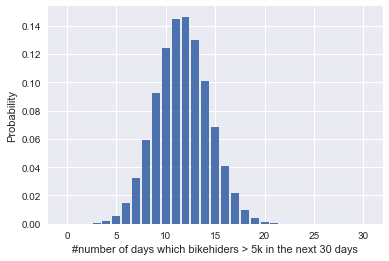

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# load the seaborn configurations
sns.set()

# The most likely number of days is between 10 and 15.
plt.bar(outcome_counts, outcome_probs)

plt.xlabel('#number of days which bikehiders > 5k in the next 30 days')
plt.ylabel('Probability')
plt.show()

6. Simplifying the computation
==

To construct our distribution, we had to write our own custom function, and a decent amount of code. We can instead use the [binom.pmf](http://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.binom.html) function from [SciPy](http://docs.scipy.org/doc/scipy/reference/index.html) to do this faster.

Here's a usage example:

>```python
from scipy import linspace
from scipy.stats import binom
# Create a range of numbers from 0 to 30, with 31 elements (each number has one entry).
outcome_counts = linspace(0,30,31)
# Create the binomial probabilities, one for each entry in outcome_counts.
dist = binom.pmf(outcome_counts,30,0.39)
```

The <span style="background-color: #F9EBEA; color:##C0392B">pmf</span> function in <span style="background-color: #F9EBEA; color:##C0392B">SciPy</span> is an implementation of the mathematical [probability mass function](https://en.wikipedia.org/wiki/Probability_mass_function). The <span style="background-color: #F9EBEA; color:##C0392B">pmf</span> will give us the probability of each <span style="background-color: #F9EBEA; color:##C0392B">k</span> in our <span style="background-color: #F9EBEA; color:##C0392B">outcome_counts</span> list occurring.

A binomial distribution only needs two parameters. A **parameter** is the statistical term for a number that summarizes data for the entire population. For a binomial distribution, the parameters are:

- <span style="background-color: #F9EBEA; color:##C0392B">N</span>, the total number of events,
- <span style="background-color: #F9EBEA; color:##C0392B">p</span>, the probability of the outcome we're interested in seeing.

The SciPy function <span style="background-color: #F9EBEA; color:##C0392B">pmf</span> matches this and takes in the following parameters:

- <span style="background-color: #F9EBEA; color:##C0392B">x</span>: the list of outcomes,
- <span style="background-color: #F9EBEA; color:##C0392B">n</span>: the total number of events,
- <span style="background-color: #F9EBEA; color:##C0392B">p</span>: the probability of the outcome we're interested in seeing.

Because we only need two parameters to describe a distribution, it doesn't matter whether we want to know if it will be sunny <span style="background-color: #F9EBEA; color:##C0392B">5</span> days out of <span style="background-color: #F9EBEA; color:##C0392B">5</span>, or if <span style="background-color: #F9EBEA; color:##C0392B">5</span> out of <span style="background-color: #F9EBEA; color:##C0392B">5</span> coin flips will turn up heads. As long as the outcome that we care about has the same *probability (p)*, and N is the same, the binomial distribution will look the same.

<br>
<div class="alert alert-info">
<b>Exercise Start.</b>
</div>

**Description**:

- Generate a **binomial distribution**, and then find the probabilities for each value in <span style="background-color: #F9EBEA; color:##C0392B">outcome_counts</span>.
- Use <span style="background-color: #F9EBEA; color:##C0392B">N=30</span>, and <span style="background-color: #F9EBEA; color:##C0392B">p=.39</span>, as we're doing this for the bikesharing data.
- Plot the resulting data as a **bar chart**.

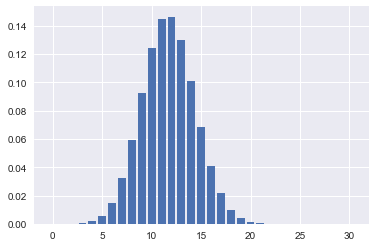

In [6]:
from scipy import linspace
from scipy.stats import binom
# Create a range of numbers from 0 to 30, with 31 elements (each number has one entry).
outcome_counts = linspace(0,30,31)
# Create the binomial probabilities, one for each entry in outcome_counts.
dist = binom.pmf(outcome_counts,30, .39)

plt.bar(outcome_counts, dist)
plt.show()

7. How to think about a probability distribution
==

Looking at a probability distribution might not be extremely intuitive. One way to think about it is that "if we repeatedly look at samples, the expected number of outcomes will follow the probability distribution".

If we repeatedly look at  <span style="background-color: #F9EBEA; color:##C0392B">30 days</span> of bikesharing data, we'll find that  <span style="background-color: #F9EBEA; color:##C0392B">10</span> of the days had more than  <span style="background-color: #F9EBEA; color:##C0392B">5000</span> riders about  <span style="background-color: #F9EBEA; color:##C0392B">12.4%</span> of the time. We'll find that  <span style="background-color: #F9EBEA; color:##C0392B">12</span> of the days had more than  <span style="background-color: #F9EBEA; color:##C0392B">5000</span> riders about  <span style="background-color: #F9EBEA; color:##C0392B">14.6%</span> of the time.

A probability distribution is a great way to visualize data, but bear in mind that it's not dealing in absolute values. A probability distribution can only tell us which values are likely, and how likely they are.


8. Computing the mean of a probability distribution
==

Sometimes we'll want to be able to tell people the expected value of a probability distribution -- the most likely result of a single sample that we look at.

To compute this, we just multiply N by p according to [Binomial Distribution](https://en.wikipedia.org/wiki/Binomial_distribution).



<br>
<div class="alert alert-info">
<b>Exercise Start.</b>
</div>

**Description**:

- Compute the mean for the bikesharing data, where *N=30*, and *p=.39*.
- Assign the result to <span style="background-color: #F9EBEA; color:##C0392B">dist_mean</span>.

In [9]:
#To compute this, we just multiply N by p according to Binomial Distribution.
# N = 30, p=.39
N = 30
p = .39
dist_mean = N*p
dist_mean

11.700000000000001

9. Computing the standard deviation
==

Just as we can compute the mean, we can also compute the standard deviation of a probability distribution. This helps us find how much the actual values will vary from the mean when we take a sample.

Going back to the bikesharing example, we know that the actual values will be around <span style="background-color: #F9EBEA; color:##C0392B">11.7</span> (from the last screen). But, we'll need a standard deviation to explain how much the actual values can vary from this expectation.

The formula for standard deviation of [Binominal distribution](https://en.wikipedia.org/wiki/Binomial_distribution) is:

$\sqrt{N∗p∗(1-p)}$

<br>
<div class="alert alert-info">
<b>Exercise Start.</b>
</div>

**Description**:

- Compute the standard deviation for the bikesharing data, where *N=30*, and *p=.39*.
- Assign the result to <span style="background-color: #F9EBEA; color:##C0392B">dist_stdev</span>.


In [11]:
def find_standard_deviation(N, p):
    calculation = N * p * (1-p)
    standard_deviation = math.sqrt(calculation)
    return standard_deviation
dist_stdev = find_standard_deviation(30,.39)
dist_stdev

2.671516423307182

10. A different plot
==

Just like we did with histograms and sampling a few missions ago, we can vary the parameters to change the distribution. Let's see what the plot would look like with only 10 events, or 100 events.


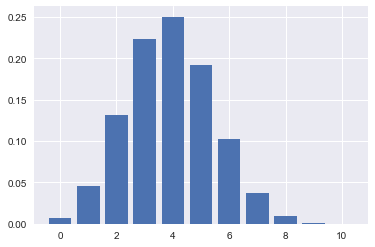

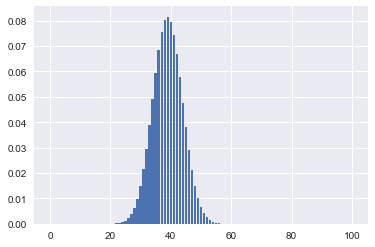

In [15]:
from scipy import linspace
from scipy.stats import binom

outcome_counts = linspace(0,10,11)
outcome_probs = binom.pmf(outcome_counts,10,0.39)
plt.bar(outcome_counts, outcome_probs)
plt.show()

outcome_counts = linspace(0,100,101)
outcome_probs = binom.pmf(outcome_counts,100,0.39)
plt.bar(outcome_counts, outcome_probs)
plt.show()

11. The normal distribution
==

From the last screen, the more events we looked at, the closer our distribution was to being normal. With N=10, we saw some rightward skew, but when we got up to N=100, the skew disappeared.

This is because the distribution got narrower relative to the x-axis range the more examples you add. With N=10, there's a reasonable chance that 8 to 10 days could have over 5000 riders. But, when we get up to N=100, it's statistically almost impossible that more than 60 days have over 5000 riders. This makes the distribution narrower.

As the distribution gets narrower, it gets more similar to the normal distribution. In the code cell, we plot a line chart instead of a bar chart and it looks almost exactly like a normal distribution.

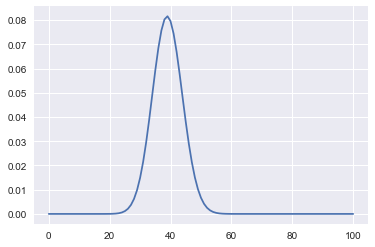

In [16]:
# Create a range of numbers from 0 to 100, with 101 elements (each number has one entry).
outcome_counts = linspace(0,100,101)

# Create a probability mass function along the outcome_counts.
outcome_probs = binom.pmf(outcome_counts,100,0.39)

# Plot a line, not a bar chart.
plt.plot(outcome_counts, outcome_probs)
plt.show()

12.  Cumulative density function
==

So far, we've looked at the probability that single values of k will occur. What we can look at instead is the probability that k or less will occur. These probabilities can be generated by the [cumulative density function](https://en.wikipedia.org/wiki/Binomial_distribution).

Let's say we flip a coin 3 times -- N=3, and p=.5. When this happens, here are the probabilities:

>```python
k    probability
0    .125
1    .375
2    .375
3    .125
```

A cumulative distribution would look like this:

>```python
k    probability
0    .125
1    .5
2    .875
3    1
```

For each k, we fill in the probability that we'll see k outcomes or less. By the end of the distribution, we should get 1, because all the probabilities add to 1 (if we flip 3 coins, either 0, 1, 2, or 3 of them must be heads).

We can calculate this with binom.cdf in scipy.

>```python
from scipy import linspace
from scipy.stats import binom
# Create a range of numbers from 0 to 30, with 31 elements (each number has one entry).
outcome_counts = linspace(0,30,31)
# Create the cumulative binomial probabilities, one for each entry in outcome_counts.
dist = binom.cdf(outcome_counts,30,0.39)
```

<br>
<div class="alert alert-info">
<b>Exercise Start.</b>
</div>

**Description**:

- Create a cumulative distribution where N=30 and p=.39 and generate a line plot of the distribution.

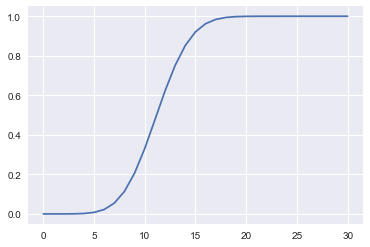

In [21]:
from scipy import linspace
from scipy.stats import binom
# Create a range of numbers from 0 to 30, with 31 elements (each number has one entry).
outcome_counts = linspace(0,30,31)
# Create the cumulative binomial probabilities, one for each entry in outcome_counts.
dist = binom.cdf(outcome_counts,30,0.39)

plt.plot(outcome_counts, dist)
plt.show()

13. Calculating z-scores
==

We can calculate z-scores (the number of standard deviations away from the mean a probability is) fairly easily. These z-scores can then be used how we used z-scores earlier -- to find the percentage of values to the left and right of the value we're looking at.

To make this more concrete, say we had 16 days where we observed more than 5000 riders. Is this likely? Unlikely? Using a z-score, we can figure out exactly how common this event is.

This is because every normal distribution, as we learned in an earlier mission, has the same properties when it comes to what percentage of the data is within a certain number of standard deviations of the mean. You can look these up in a [standard normal table](https://en.wikipedia.org/wiki/Standard_normal_table). About 68% of the data is within 1 standard deviationof the mean, 95% is within 2, and 99% is within 3.

We can calculate the mean ($\mu$) and standard deviation ($\sigma$) of a binomial probability distribution using the formulas from earlier:

$\mu = N \times p$

$\sigma = \sqrt{N \times p \times (1-p)}$

If we want to figure out the number of standard deviations from the mean a value is, we just do:

$\displaystyle \frac{k-\mu}{\sigma}$

If we wanted to find how many standard deviations from the mean 16 days is:

$\displaystyle \frac{16-\mu}{\sigma} = \frac{16 - (30 \times 0.39)}{\sqrt{30 \times 0.39 \times 0.61}} = \frac{4.30}{2.67} = 1.61$

This tells us that 16 days is approximately 1.61 standard deviations above the mean. In percentage form, this captures about 44.63% of our data. If we also include 1.61 standard deviations below the mean(both sides of distribution), this'll include 89.26% of our data.

There's a 5.37% chance that a value is 1.61 standard deviations or more above the mean (to the right of the mean), and there's a 5.37% chance that a value is 1.61 standard deviations below the mean (to the left).

14. Faster way to calculate likelihood
==

We don't want to have to use a z-score table every time we want to see how likely or unlikely a probability is. A much faster way is to use the cumulative distribution fuction (cdf) like we did earlier. This won't give us the exact same values as using z-scores, because the distribution isn't exactly normal, but it will give us the actual amount of probability in a distribution to the left of a given k.

To use it, we can run:

>```python
# The sum of all the probabilities to the left of k, including k.
left = binom.cdf(k,N,p)
# The sum of all probabilities to the right of k.
right = 1 - left
```

This will return the sum of all the probabilities to the left of and including k. If we subtract this value from 1, we get the sum of all the probabilities to the right of k.

<br>
<div class="alert alert-info">
<b>Exercise Start.</b>
</div>

**Description**:

- Find the probability to the left of k=16 (including 16) when N=30 and p=.39.
    - Assign the result to left_16.
- Find the probability to the right of k=16 when N=30 and p=.39.
    - Assign the result to right_16.

In [23]:
left_16 = binom.cdf(16,30,.39)
right_16 = 1 - left_16
left_16

0.96230037660548828

In [24]:
right_16

0.037699623394511717

15. Geometric distribution
==

The geometric distribution is discrete and models the number of trials it takes to achieve a success in repeated experiments with a given probability of success.


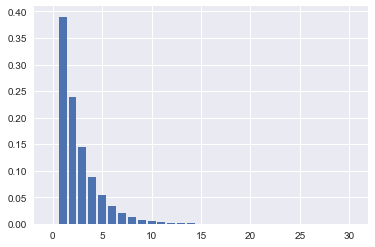

In [26]:
from scipy import linspace
from scipy.stats import geom

# Create a range of numbers from 0 to 30, with 31 elements (each number has one entry).
outcome_counts = linspace(0,30,31)

# Create the pmf, one for each entry in outcome_counts.
outcome_probs = geom.pmf(outcome_counts,0.39)

plt.bar(outcome_counts, outcome_probs)
plt.show()